***
# Portfolio Optimization techniques


This notebook will be following the Markowitz technique for portfolio optimization. Follow this [site](https://cvxr.rbind.io/cvxr_examples/cvxr_portfolio-optimization/).

First we will take random data and plot them to see their returns. In this notebook, risk (aka volatility) will be quantified as the standard deviation of returns.

Once we generate the returns, the next step will be to generate weights for each of the assets. The goal here is to maximise returns while minimizing risks. And we will assume that our entire capital will be invested in all the companies, so the weights add up to 1.
To evaluate how well our portfolios would perform, we need to calculate two things:
1. The mean returns of the portfolio.
2. The volatility (standard deviation).

The expected return, $R$, is calculated as follows with R being the return, p being the vector (whose length is equal to the number of stocks) of means of the entire porfolio and W being the random weights:

### <center> $R = p^TW$

The standard deviation, $\sigma$, is calculated using the covariance, $C$ of the returns along with the weights:

### <center> $\sigma = \sqrt(W^TCW)$

The diagonal elements of the covariance matrix indicate the amount of variance in each individual stock, while the off diagonal elements indicate the amount of variance between stocks. If we only use the regular standard deviation formula, we only get the diagonal elements.

## Markowitz optimization and the Efficient Frontier

The plot of returns vs. volatility -- characteristically assuming the form of a parabola called the [Markowitz bullet](https://en.wikipedia.org/wiki/Efficient_frontier#:~:text=Efficient%20Frontier.,line%20is%20the%20efficient%20frontier.). The borders of this paraboa, called the **efficient frontier**, have the lowest variance for a given expected return.

In an optimization framework, this is done by maximizing returns adjusted with risk:

### <center> maximize $(R - \sigma^2)$

subject to:

### <center> $\sum_{i} W = 1$

### <center> $w_{i}>=0$

We will be using the convex optimization library, CVXPY, to solve the optimization problem: it is a Python-embedded modeling language for convex optimization problems. It allows you to express your problem in a natural way that follows the mathematical model, rather than in the restrictive standard form required by solvers.

***

In [1]:
## Import libraries.
import sys
## Certain imports are failing.
sys.path.append('/home/sharatpc/.local/lib/python3.8/site-packages')

import cvxpy as cp
import matplotlib.pyplot as plt         # Graphs
import numpy as np                      # Arrays
import os                               # Operating system
import pandas as pd

In [2]:
## Trying with random data.
num_observations = 50
num_assets = 5
asset_obs_matrix = np.random.randn(num_observations,num_assets)
asset_obs_matrix.shape

(50, 5)

Text(0.5, 1.0, 'Returns over Time')

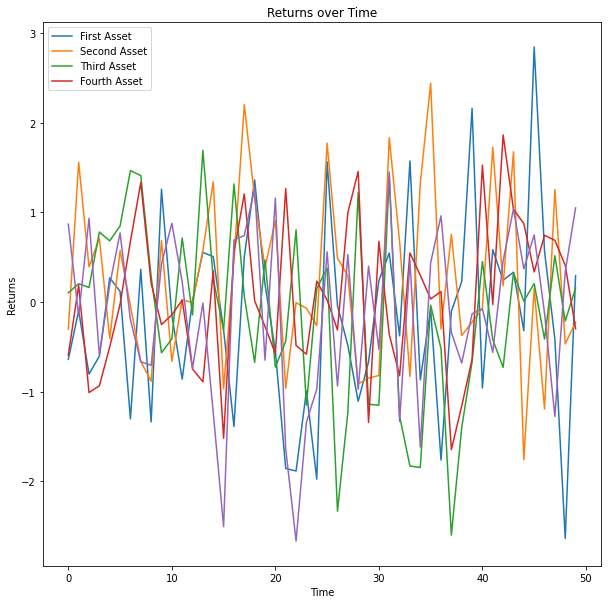

In [3]:
fig = plt.figure(figsize=(10,10))
plt.plot(asset_obs_matrix)
plt.xlabel("Time")
plt.ylabel("Returns")
plt.legend(['First Asset', 'Second Asset','Third Asset','Fourth Asset'])
plt.title("Returns over Time")

In [4]:
means = np.asarray(np.mean(asset_obs_matrix,axis=0)) ## Compute the mean returns.
covar = np.asarray(np.cov(asset_obs_matrix,rowvar=False)) ## Compute the covariance.
weights = cp.Variable(num_assets)
r = means.T@weights
risk = cp.quad_form(weights,covar)
# Construct the problem.
objective = cp.Maximize(r-risk)
constraints = [sum(weights)==1, weights >= 0]
prob = cp.Problem(objective, constraints)

In [5]:
try:
    prob.solve()
except:
    print ("Error")

In [6]:
prob.status

'optimal'

In [7]:
weights.value

array([0.06958242, 0.38009902, 0.09154844, 0.39995538, 0.05881475])

***
## With Historical Stock Data
Now I will compute the same by taking the Nifty50 data dating from 2020-05-04 until 2021-04-30.

In [8]:
nifty_data = pd.read_csv(os.getcwd()+"/nifty_50_close.csv") ## Read data from CSV and store in DataFrame.
company_names = [cols for cols in nifty_data.columns]
company_dict = {index:name for index,name in enumerate(company_names)}
num_observations = nifty_data.shape[0]
num_assets = nifty_data.shape[1]
nifty_data = nifty_data.to_numpy() ## Transform DataFrame into a Numpy Array.

In [9]:
means = np.asarray(np.mean(nifty_data,axis=0))
covar = np.asarray(np.cov(nifty_data,rowvar=False))
weights = cp.Variable(num_assets)
r = means.T@weights
risk = cp.quad_form(weights,covar)
# Construct the problem.
objective = cp.Maximize(r-risk)
constraints = [sum(weights)==1, weights >= 0]
prob = cp.Problem(objective, constraints)

In [10]:
try:
    prob.solve()
    for s in range(len(company_dict)):
        print("Investment in {}:\t {}% of the portfolio".format(company_dict[s],round(100*weights.value[s],2)))
except Exception as e:
    print ("Error: {}".format(e))

Investment in ASIANPAINT:	 0.0% of the portfolio
Investment in BAJAJ-AUTO:	 0.0% of the portfolio
Investment in BAJAJFINSV:	 0.0% of the portfolio
Investment in ADANIPORTS:	 0.0% of the portfolio
Investment in AXISBANK:	 0.0% of the portfolio
Investment in BAJFINANCE:	 0.0% of the portfolio
Investment in BHARTIARTL:	 5.0% of the portfolio
Investment in BPCL:	 0.0% of the portfolio
Investment in BRITANNIA:	 2.47% of the portfolio
Investment in CIPLA:	 0.0% of the portfolio
Investment in COALINDIA:	 -0.0% of the portfolio
Investment in DRREDDY:	 0.72% of the portfolio
Investment in EICHERMOT:	 0.1% of the portfolio
Investment in GAIL:	 -0.0% of the portfolio
Investment in GRASIM:	 0.0% of the portfolio
Investment in HCLTECH:	 0.0% of the portfolio
Investment in HDFC:	 0.0% of the portfolio
Investment in HDFCBANK:	 0.0% of the portfolio
Investment in HEROMOTOCO:	 0.0% of the portfolio
Investment in HINDALCO:	 0.0% of the portfolio
Investment in HINDUNILVR:	 0.0% of the portfolio
Investmen

***
# Next Steps

We can see that if we add too many stocks to out portfolio, most of these stocks end up with no amount of money invested in them.

We can add more constraints to this problem such as including transaction costs by the broker, etc.

Finally, at some point, I hope to incorporate a more refined version of this in my algo-trading strategies.
***
# References

1. Portfolio Optimization using R
2. Lobo, M. S., M. Fazel, and S. Boyd. 2007. “Portfolio Optimization with Linear and Fixed Transaction Costs.” Annals of Operations Research 152 (1): 341–65.
3. [Porfolio Optimization by Dr Tirthajyoti Sarkar](https://tirthajyoti.github.io/Notebooks/Portfolio_optimization.html)